In [141]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
from plotly.subplots import make_subplots
import pickle
import re
import numpy as np
import pandas as pd

with open('evaluation_full.pkl', 'rb') as f:
    df = pickle.load(f)

In [143]:
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import numpy as np

temp = df[df['Dataset'].str.contains('Base_Phi', na=False)]
temp2 = temp[~temp['Dataset'].str.contains('Interpolated', na=False)]

/var/folders/92/j78p1t2n7xxf3nf7zgdc3t4w0000gn/T/ipykernel_1385/1299178053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding SVM", "DistilBert Embedding SVM")
/var/folders/92/j78p1t2n7xxf3nf7zgdc3t4w0000gn/T/ipykernel_1385/1299178053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Simple NN", "DistilBert Em

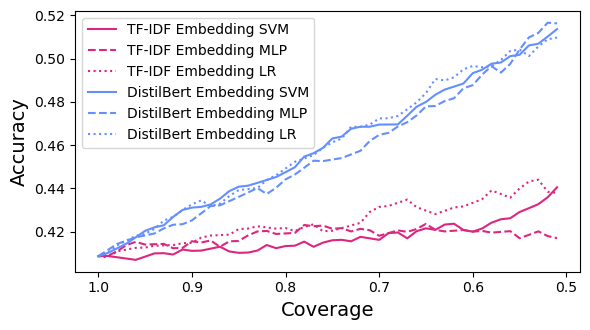

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

methods = [
    'TF-IDF Embedding SVM', 'TF-IDF Embedding MLP', 
    'TF-IDF Embedding LR', 'DistilBert Embedding SVM', 
    'DistilBert Embedding MLP', 'DistilBert Embedding LR'
]

filtered_df = temp2[temp2['Dataset'] == 'Base_Phi_GLUE_STSB']
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding SVM", "DistilBert Embedding SVM")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Simple NN", "DistilBert Embedding MLP")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Logistic Regression", "DistilBert Embedding LR")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding SVM", "TF-IDF Embedding SVM")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding Simple NN", "TF-IDF Embedding MLP")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding Logistic Regression", "TF-IDF Embedding LR")

filtered_df = filtered_df[filtered_df['Method_Classifier'].isin(methods)]
filtered_df = filtered_df.sort_values(by="Coverage", ascending=False)

color_map = {
    'TF-IDF': '#DC267F',
    'DistilBert': '#648FFF'
}
line_styles = ['-', '--', ':']

plt.figure(figsize=(6, 3.4))

for i, method in enumerate(methods):
    subset = filtered_df[filtered_df['Method_Classifier'] == method]
    subset = subset[subset['Coverage'] > 0.5]
    label = method
    color = color_map['TF-IDF'] if 'TF-IDF' in method else color_map['DistilBert']
    style = line_styles[i % len(line_styles)]
    plt.plot(subset['Coverage'], subset['Accuracy'], label=label, color=color, linestyle=style)

plt.xlabel('Coverage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best', fontsize=10)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('exp1_embedding_differences', dpi=300, bbox_inches='tight') 
plt.show()

/var/folders/92/j78p1t2n7xxf3nf7zgdc3t4w0000gn/T/ipykernel_1385/2749413392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding SVM", "DistilBert Embedding SVM")
/var/folders/92/j78p1t2n7xxf3nf7zgdc3t4w0000gn/T/ipykernel_1385/2749413392.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Simple NN", "DistilBert Em

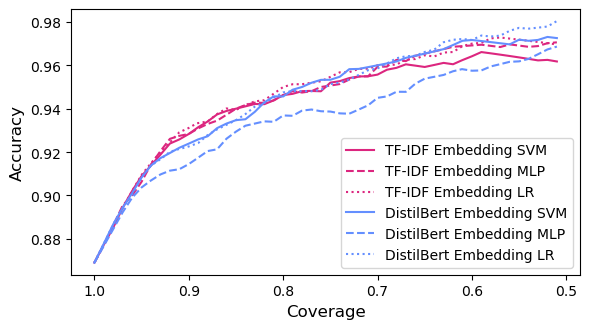

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

methods = [
    'TF-IDF Embedding SVM', 'TF-IDF Embedding MLP', 
    'TF-IDF Embedding LR', 'DistilBert Embedding SVM', 
    'DistilBert Embedding MLP', 'DistilBert Embedding LR'
]

filtered_df = temp2[temp2['Dataset'] == 'Base_Phi_Spam_text']
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding SVM", "DistilBert Embedding SVM")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Simple NN", "DistilBert Embedding MLP")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Distilbert Embedding Logistic Regression", "DistilBert Embedding LR")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding SVM", "TF-IDF Embedding SVM")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding Simple NN", "TF-IDF Embedding MLP")
filtered_df['Method_Classifier'] = filtered_df['Method_Classifier'].replace("Tf-Idf Embedding Logistic Regression", "TF-IDF Embedding LR")
filtered_df = filtered_df[filtered_df['Data_size'] == 10000]

filtered_df = filtered_df[filtered_df['Method_Classifier'].isin(methods)]
filtered_df = filtered_df.sort_values(by="Coverage", ascending=False)

color_map = {
    'TF-IDF': '#DC267F',
    'DistilBert': '#648FFF'
}
line_styles = ['-', '--', ':']

plt.figure(figsize=(6, 3.4))

for i, method in enumerate(methods):
    subset = filtered_df[filtered_df['Method_Classifier'] == method]
    subset = subset[subset['Coverage'] > 0.5]
    label = method
    color = color_map['TF-IDF'] if 'TF-IDF' in method else color_map['DistilBert']
    style = line_styles[i % len(line_styles)]
    plt.plot(subset['Coverage'], subset['Accuracy'], label=label, color=color, linestyle=style)

plt.xlabel('Coverage', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=10)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('appendix_exp1_embedding_differences', dpi=300, bbox_inches='tight') 
plt.show()